In [216]:
##Loading the depandancy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [217]:
#data loaded in pandas data frame
prisoners = pd.read_csv("/Users/amit/data/prisoners.csv")

In [218]:
#Display 1st and last five records of data frame
prisoners.shape

(35, 6)

In [219]:
def getIndex(df):
    l = df.shape[0]
    return [0] + list(range(l-5, l))    

In [220]:
indexes = getIndex(prisoners)

In [221]:
indexes

[0, 30, 31, 32, 33, 34]

In [222]:
prisoners.iloc[indexes]

,STATE/UT,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
0,Andhra Pradesh,2013,9480,13758,672,170
30,D & N Haveli,2013,0,0,0,0
31,Daman & Diu,2013,0,0,0,0
32,Delhi,2013,1458,1187,908,174
33,Lakshadweep,2013,0,0,0,0
34,Pondicherry,2013,0,0,0,0


In [223]:
prisoners.describe()

,YEAR,No. of Inmates benefitted by Elementary Education,No. of Inmates benefitted by Adult Education,No. of Inmates benefitted by Higher Education,No. of Inmates benefitted by Computer Course
count,35.0,35.000000,35.000000,35.000000,35.000000
mean,2013.0,1057.914286,1534.857143,237.457143,210.171429
std,0.0,2078.196777,3022.110503,375.614191,359.117340
min,2013.0,0.000000,0.000000,0.000000,0.000000
25%,2013.0,0.000000,6.500000,2.000000,0.000000
50%,2013.0,167.000000,237.000000,33.000000,38.000000
75%,2013.0,1294.500000,1733.500000,234.500000,227.500000
max,2013.0,9480.000000,13758.000000,1353.000000,1417.000000


In [224]:
prisoners.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
STATE/UT                                             35 non-null object
YEAR                                                 35 non-null int64
No. of Inmates benefitted by Elementary Education    35 non-null int64
No. of Inmates benefitted by Adult Education         35 non-null int64
No. of Inmates benefitted by Higher Education        35 non-null int64
No. of Inmates benefitted by Computer Course         35 non-null int64
dtypes: int64(5), object(1)
memory usage: 1.7+ KB


### There are two possibilities for 0 inmates in prison:
a. There are no prsoners in the jail and it has been closed. <br>
b. The data is not correct. 

In [225]:
column_names = [x.replace(' ','_') for x in prisoners.columns]


In [226]:
column_names

['STATE/UT',
 'YEAR',
 'No._of_Inmates_benefitted_by_Elementary_Education',
 'No._of_Inmates_benefitted_by_Adult_Education',
 'No._of_Inmates_benefitted_by_Higher_Education',
 'No._of_Inmates_benefitted_by_Computer_Course']

In [227]:
prisoners.rename(columns = lambda x: x.replace(' ', '_'), inplace = True)

In [228]:
prisoners.columns

Index(['STATE/UT', 'YEAR', 'No._of_Inmates_benefitted_by_Elementary_Education',
       'No._of_Inmates_benefitted_by_Adult_Education',
       'No._of_Inmates_benefitted_by_Higher_Education',
       'No._of_Inmates_benefitted_by_Computer_Course'],
      dtype='object')

In [229]:
prisoners['total_benefitted'] = np.zeros(prisoners.shape[0])

In [230]:
benefit_type = ['No._of_Inmates_benefitted_by_Elementary_Education',
       'No._of_Inmates_benefitted_by_Adult_Education',
       'No._of_Inmates_benefitted_by_Higher_Education',
       'No._of_Inmates_benefitted_by_Computer_Course']

In [231]:
for benefit in benefit_type:
    prisoners['total_benefitted'] += prisoners[benefit]

In [232]:
benefit_type.append('total_benefitted')

In [234]:
measures = {benefit: np.sum(prisoners[benefit]) for benefit in benefit_type}

In [235]:
measures

{'No._of_Inmates_benefitted_by_Elementary_Education': 37027,
 'No._of_Inmates_benefitted_by_Adult_Education': 53720,
 'No._of_Inmates_benefitted_by_Higher_Education': 8311,
 'No._of_Inmates_benefitted_by_Computer_Course': 7356,
 'total_benefitted': 106414.0}

In [236]:
measures['STATE/UT'] = 'Aggregated'

In [238]:
measures['YEAR'] = 2013

In [239]:
measures

{'No._of_Inmates_benefitted_by_Elementary_Education': 37027,
 'No._of_Inmates_benefitted_by_Adult_Education': 53720,
 'No._of_Inmates_benefitted_by_Higher_Education': 8311,
 'No._of_Inmates_benefitted_by_Computer_Course': 7356,
 'total_benefitted': 106414.0,
 'STATE/UT': 'Aggregated',
 'YEAR': 2013}

In [240]:
prisoners = prisoners.append(measures, ignore_index=True)

In [241]:
import matplotlib.pyplot as plt
plt.style.reload_library()
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [242]:
print(prisoners.columns)
states = prisoners['STATE/UT'].values
total_benefitted_inmates = prisoners['total_benefitted'].values

Index(['STATE/UT', 'YEAR', 'No._of_Inmates_benefitted_by_Elementary_Education',
       'No._of_Inmates_benefitted_by_Adult_Education',
       'No._of_Inmates_benefitted_by_Higher_Education',
       'No._of_Inmates_benefitted_by_Computer_Course', 'total_benefitted'],
      dtype='object')


In [256]:
pairs = {pair[0]: pair[1] for pair in zip(states, total_benefitted_inmates) if pair[1] > 5000}

In [257]:
states = list(pairs.keys())[:-1]
total_benefitted_inmates = list(pairs.values())[:-1]

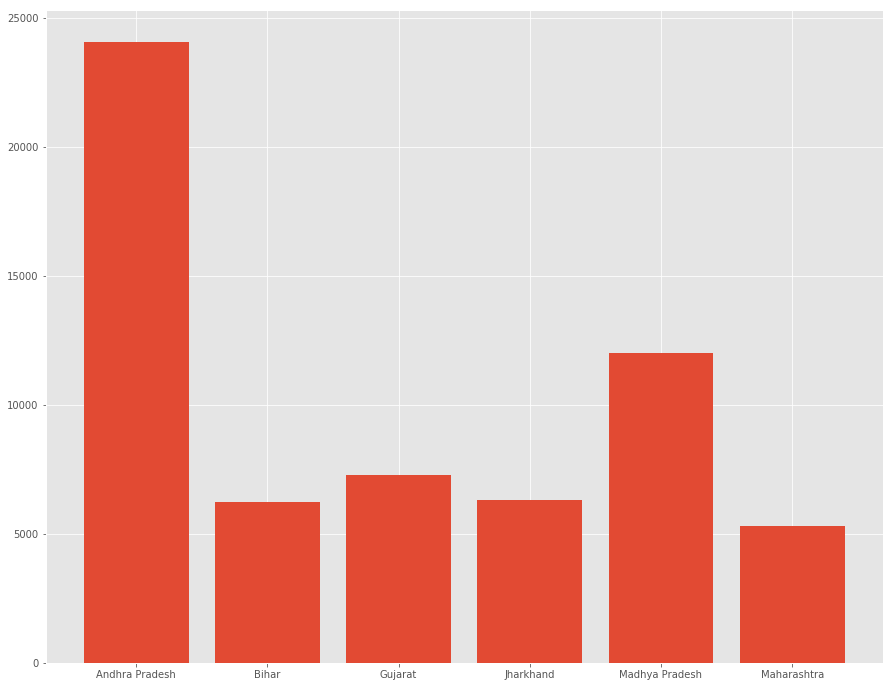

In [258]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(15,12))
    plt.bar(states, total_benefitted_inmates)

### Andhra Pradesh has maximum number of beneficiaries. 

In [283]:
label = ['No._of_Inmates_benefitted_by_Elementary_Education',
       'No._of_Inmates_benefitted_by_Adult_Education',
       'No._of_Inmates_benefitted_by_Higher_Education',
       'No._of_Inmates_benefitted_by_Computer_Course']

([<matplotlib.patches.Wedge at 0x12262b6d8>,
 [Text(-0.976874,0.505684,'No._of_Inmates_benefitted_by_Elementary_Education'),
  Text(0.64859,-0.888443,'No._of_Inmates_benefitted_by_Adult_Education'),
  Text(0.69141,0.855542,'No._of_Inmates_benefitted_by_Higher_Education'),
  Text(0.23701,1.07416,'No._of_Inmates_benefitted_by_Computer_Course')],
 [Text(-0.532841,0.275828,'34.8%'),
  Text(0.353777,-0.484605,'50.5%'),
  Text(0.377133,0.466659,'7.8%'),
  Text(0.129278,0.585907,'6.9%')])

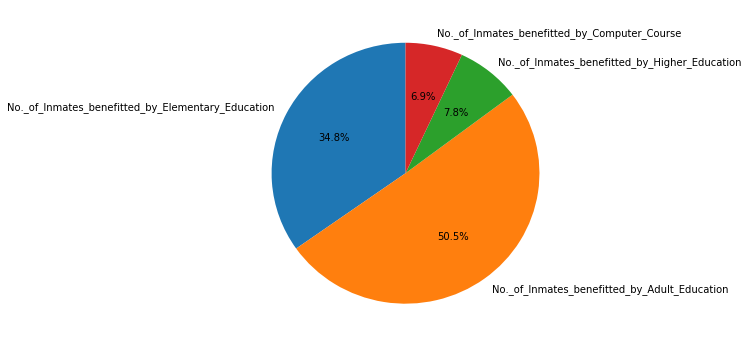

In [290]:
plt.figure(figsize=(6, 6))

plt.pie(prisoners.loc[35][label], labels = label, startangle = 90, autopct='%1.1f%%')